In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from collect_functions import *
import seaborn as sns
from constants import *

## Dowload data

In [2]:
def download_data():
    !aws s3 cp s3://bucketeer-a8bc3620-012c-4a16-be48-3d17178aa6b8/data/ data/videos --recursive

In [3]:
download_data()

download: s3://bucketeer-a8bc3620-012c-4a16-be48-3d17178aa6b8/data/2ujw70BpDdTGzp/TN/RL5g==.json to data/videos/2ujw70BpDdTGzp/TN/RL5g==.json
download: s3://bucketeer-a8bc3620-012c-4a16-be48-3d17178aa6b8/data/D4uiUJ/EgKY/INHCGj/zbg==.json to data/videos/D4uiUJ/EgKY/INHCGj/zbg==.json
download: s3://bucketeer-a8bc3620-012c-4a16-be48-3d17178aa6b8/data/HVDLf2r0y7Gy2fVNe+f8cA==.json to data/videos/HVDLf2r0y7Gy2fVNe+f8cA==.json
download: s3://bucketeer-a8bc3620-012c-4a16-be48-3d17178aa6b8/data/8mqvDLqaYkKm/O9j6lcRfQ==.json to data/videos/8mqvDLqaYkKm/O9j6lcRfQ==.json
download: s3://bucketeer-a8bc3620-012c-4a16-be48-3d17178aa6b8/data/M5oREKcp0HD8Hv49IL3+ew==.json to data/videos/M5oREKcp0HD8Hv49IL3+ew==.json
download: s3://bucketeer-a8bc3620-012c-4a16-be48-3d17178aa6b8/data/JPAk5NjQ0Dw1LNeUqy+f8A==.json to data/videos/JPAk5NjQ0Dw1LNeUqy+f8A==.json
download: s3://bucketeer-a8bc3620-012c-4a16-be48-3d17178aa6b8/data/AaOz6Ezrnl6wYfFXN9drZw==.json to data/videos/AaOz6Ezrnl6wYfFXN9drZw==.json
downlo

## Collect data in dataframes

In [9]:
# get data files
filenames = [y for x in os.walk(VIDEOS_PATH) for y in glob(os.path.join(x[0], '*.json'))]

# write dataframes to disk
store_all_df(filenames, agg_features="max", agg_survey=False)
store_all_df(filenames, agg_features="mean", agg_survey=False)
store_all_df(filenames, agg_features="slope", agg_survey=False)
store_all_time_series(filenames)

In [2]:
# read mains dataframes
df_features_mean = pd.read_csv(DATAFRAMES_PATH + "df_features_agg_mean.csv")
df_features_max = pd.read_csv(DATAFRAMES_PATH + "df_features_agg_max.csv")
df_features_slope = pd.read_csv(DATAFRAMES_PATH + "df_features_agg_slope.csv")

df_generals = pd.read_csv(DATAFRAMES_PATH + "df_generals.csv")
df_answers = pd.read_csv(DATAFRAMES_PATH + "df_answers.csv")

In [3]:
# set indexes of dataframes
df_features_max.set_index(["user_id", "video_id"], inplace=True)
df_features_mean.set_index(["user_id", "video_id"], inplace=True)
df_features_slope.set_index(["user_id", "video_id"], inplace=True)
df_answers.set_index(["user_id", "video_id"], inplace=True)
df_generals.set_index("user_id", inplace=True)

In [4]:
NB_PARTICIPANTS = len(df_generals)
print("We had {0} participations".format(NB_PARTICIPANTS))

We had 45 participations


In [5]:
df_answers.head(10)

fake/natural  stagnant/lively  inert/interactive  \
user_id video_id                                                     
0       1.0                4.0              3.0                3.0   
        2.0                3.0              3.0                4.0   
        3.0                2.0              3.0                4.0   
1       1.0                4.0              3.0                2.0   
        2.0                2.0              3.0                3.0   
        3.0                3.0              4.0                4.0   
2       1.0                1.0              5.0                3.0   
        2.0                1.0              4.0                4.0   
        3.0                1.0              3.0                3.0   
3       1.0                4.0              4.0                3.0   

                  unconscious/conscious  incompetent/competent  \
user_id video_id                                                 
0       1.0                         1.0                    5.0   
        2.0                         4.0                    3.0   
        3.0                         3.0                    4.0   
1       1.0                         2.0                    4.0   
        2.0                         2.0                    3.0   
        3.0                         4.0                    4.0   
2       1.0                         1.0                    4.0   
        2.0                         4.0                    4.0   
        3.0                         2.0                    4.0   
3       1.0                         3.0                    5.0   

                  unintelligent/intelligent  mechanical/organic  \
user_id video_id                                                  
0       1.0                             1.0                 1.0   
        2.0                             2.0                 2.0   
        3.0                             4.0                 3.0   
1       1.0                             3.0                 1.0   
        2.0                             3.0                 1.0   
        3.0                             4.0                 3.0   
2       1.0                             4.0                 1.0   
        2.0                             3.0                 1.0   
        3.0                             3.0                 1.0   
3       1.0                             3.0                 1.0   

                  unresponsive/responsive  foolish/sensible  \
user_id video_id                                              
0       1.0                           5.0               3.0   
        2.0                           4.0               3.0   
        3.0                           3.0               4.0   
1       1.0                           4.0               4.0   
        2.0                           3.0               4.0   
        3.0                           4.0               4.0   
2       1.0                           1.0               3.0   
        2.0                           3.0               3.0   
        3.0                           2.0               1.0   
3       1.0                           4.0               4.0   

                  ignorant/knowledgeable  machinelike/humanlike  \
user_id video_id                                                  
0       1.0                          1.0                    1.0   
        2.0                          3.0                    3.0   
        3.0                          4.0                    4.0   
1       1.0                          3.0                    1.0   
        2.0                          3.0                    1.0   
        3.0                          4.0                    3.0   
2       1.0                          4.0                    1.0   
        2.0                          4.0                    1.0   
        3.0                          2.0                    1.0   
3       1.0                          3.0                    1.0   

                 

In [7]:
df_answers.describe()

,fake/natural,stagnant/lively,inert/interactive,unconscious/conscious,incompetent/competent,unintelligent/intelligent,mechanical/organic,unresponsive/responsive,foolish/sensible,ignorant/knowledgeable,machinelike/humanlike,artificial/lifelike,dead/alive,unpleasant/pleasant,ridig/smooth,dislike/like,irresponsible/responsible,awful/nice,unfriendly/friendly,unkind/kind
count,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,2.303704,3.311111,3.370370,2.488889,3.607407,3.296296,2.148148,3.274074,3.185185,3.281481,2.177778,2.133333,2.548148,3.325926,3.051852,3.355556,3.437037,3.555556,3.525926,3.555556
std,1.024142,1.162002,1.207815,1.245090,1.079637,1.222147,1.054617,1.224316,1.114258,1.097160,1.177315,1.151249,1.070071,1.164331,1.223639,1.142573,1.033812,1.062710,1.091553,0.959374
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,1.000000,3.000000,2.500000,1.000000,2.500000,2.500000,3.000000,1.000000,1.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,2.000000,3.000000,4.000000,2.000000,4.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000
75%,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [11]:
df_features_slope.head(10)

nb_timestamps  smile  innerBrowRaise  browRaise  browFurrow  \
user_id video_id                                                                
0       1                  1471    0.0            45.0        3.0         0.0   
        2                  1137   15.0            71.0        0.0         1.0   
        3                  1141    0.0            65.0        9.0         0.0   
1       1                  1146    0.0            45.0       26.0        12.0   
        2                   861    0.0            61.0        4.0         7.0   
        3                  1004    0.0            66.0      110.0        12.0   
2       1                   365    0.0             3.0        2.0       129.0   
        2                   234    0.0             0.0        0.0         2.0   
        3                   260   93.0             0.0        1.0         0.0   
3       1                  1686   70.0             8.0       77.0         4.0   

                  noseWrinkle  upperLipRaise  lipCornerDepressor  chinRaise  \
user_id video_id                                                              
0       1                 0.0            0.0                 0.0        0.0   
        2                 0.0            0.0                 0.0        3.0   
        3                 0.0            0.0                 0.0        4.0   
1       1                 0.0            0.0                 0.0       69.0   
        2                 0.0            0.0                 5.0       16.0   
        3                 2.0            0.0                 3.0      284.0   
2       1                 0.0            0.0                 0.0        0.0   
        2                 0.0            0.0                 0.0        0.0   
        3                 0.0            0.0                 0.0      172.0   
3       1                 0.0            0.0                 0.0        0.0   

                  lipPucker  lipPress  lipSuck  mouthOpen  smirk  eyeClosure  
user_id video_id                                                              
0       1               0.0       4.0     24.0        0.0    0.0         0.0  
        2               0.0       0.0     27.0        0.0    1.0         0.0  
        3               3.0       8.0     32.0        0.0    0.0        60.0  
1       1              52.0       9.0     48.0        1.0   57.0         0.0  
        2             132.0      44.0     23.0        0.0    0.0         0.0  
        3              50.0     142.0    401.0       28.0   67.0        19.0  
2       1               0.0       3.0     51.0        0.0    0.0        92.0  
        2               0.0      23.0     11.0        0.0    7.0       207.0  
        3               5.0     266.0     67.0        0.0   40.0        58.0  
3       1              42.0      18.0      0.0        0.0    0.0       125.0

In [12]:
df_features_slope.describe()

,nb_timestamps,smile,innerBrowRaise,browRaise,browFurrow,noseWrinkle,upperLipRaise,lipCornerDepressor,chinRaise,lipPucker,lipPress,lipSuck,mouthOpen,smirk,eyeClosure
count,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,843.985185,68.629630,78.266667,95.985185,139.133333,84.325926,24.051852,23.222222,59.511111,43.955556,62.644444,57.281481,72.125926,38.229630,605.051852
std,437.178402,195.028805,159.792786,155.557543,294.440623,255.300520,118.635924,58.181864,103.059964,104.975965,96.594356,102.556184,143.198090,78.255317,835.688074
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,591.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.500000,0.000000,0.000000,0.000000,24.500000
50%,813.000000,0.000000,11.000000,45.000000,12.000000,1.000000,0.000000,0.000000,12.000000,5.000000,23.000000,15.000000,9.000000,2.000000,218.000000
75%,1064.500000,44.500000,63.000000,120.000000,115.500000,41.000000,0.000000,8.500000,68.000000,35.000000,89.000000,63.000000,91.000000,49.000000,1039.500000
max,3250.000000,1877.000000,995.000000,927.000000,1666.000000,2214.000000,1217.000000,434.000000,576.000000,884.000000,550.000000,581.000000,1191.000000,499.000000,4448.000000


In [13]:
df_generals.head()

,age,gender,robotRealLife
user_id,,,
0,24,Male,0
1,29,Male,1
2,22,Male,1
3,32,Male,0
4,21,Male,1


In [14]:
df_generals.describe()

,age,robotRealLife
count,45.000000,45.000000
mean,30.777778,0.400000
std,14.486497,0.495434
min,18.000000,0.000000
25%,22.000000,0.000000
50%,24.000000,0.000000
75%,34.000000,1.000000
max,76.000000,1.000000


In [15]:
df_generals["gender"].value_counts()

Male      25
Female    20
Name: gender, dtype: int64

In [22]:
df_lipSuck_1 = pd.read_csv(DATAFRAMES_PATH + "df_lipSuck_1.csv")

In [25]:
df_lipSuck_1.head()

,user_id,video_id,00:01:11,00:01:12,00:01:13,00:01:14,00:01:15,00:01:16,00:01:17,00:01:18,...,00:02:21,00:02:22,00:02:23,00:02:24,00:02:25,00:02:26,00:02:27,00:02:28,00:02:29,00:02:30
0,0,1,1.125,0.333333,0.166667,0.0,1.210526,5.45,8.315789,3.789474,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.166667,0.00,0.000000,0.0
1,1,1,0.000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,...,0.800000,1.666667,0.866667,0.2,1.266667,0.400000,0.000000,0.00,0.133333,0.0
2,2,1,NaN,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,...,0.333333,1.200000,0.200000,0.0,0.000000,2.333333,1.250000,0.75,0.250000,NaN
3,3,1,NaN,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.0
4,4,1,NaN,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.0


## Data cleaning

In [26]:
# minimum lenght of the time series for proper analysis
threshold = 100
# non-meaning full data
indices_to_drop = df_features_max[df_features_max.nb_timestamps < 100].index

# remove such videos, and their corresponding answers in the survey
df_features_max.drop(indices_to_drop, inplace=True)
df_features_mean.drop(indices_to_drop, inplace=True)
df_features_slope.drop(indices_to_drop, inplace=True)
df_answers.drop(indices_to_drop, inplace=True)

assert(len(df_answers) == len(df_features_max))

In [27]:
# Aggregate answers for each part of the survey
df_answers["Anthropo_mean"] = df_answers[ANTHROPOMORPHISM_COLUMNS].mean(axis=1)
df_answers["Animacy_mean"] = df_answers[ANIMACY_COLUMNS].mean(axis=1)
df_answers["Likeability_mean"] = df_answers[LIKEABILITY_COLUMNS].mean(axis=1)
df_answers["Intelligence_mean"] = df_answers[INTELLIGENCE_COLUMNS].mean(axis=1)

## Finding correlation between features and answers

In [28]:
# collect all data in a single dataframe
df_corr_max = df_features_max.drop("nb_timestamps",axis=1)
df_corr_max["Anthropo_mean"] = df_answers["Anthropo_mean"] 
df_corr_mean = df_features_mean.drop("nb_timestamps",axis=1)
df_corr_mean["Anthropo_mean"] = df_answers["Anthropo_mean"] 
df_corr_slope = df_features_slope.drop("nb_timestamps",axis=1)
df_corr_slope["Anthropo_mean"] = df_answers["Anthropo_mean"] 

In [29]:
df_corr_max.head()

smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
user_id video_id                                                              
0       1           0.0             7.0        1.0         0.0          0.0   
        2          41.0            13.0        0.0         1.0          0.0   
        3           0.0             7.0        1.0         0.0          0.0   
1       1          39.0            14.0       44.0         6.0          0.0   
        2           0.0            57.0        2.0         6.0          0.0   

                  upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  \
user_id video_id                                                            
0       1                   0.0                 0.0        0.0        0.0   
        2                   0.0                 0.0        2.0        0.0   
        3                   0.0                 0.0        3.0        1.0   
1       1                   0.0                 0.0       15.0       59.0   
        2                   0.0                 4.0        2.0       60.0   

                  lipPress  lipSuck  mouthOpen  smirk  eyeClosure  \
user_id video_id                                                    
0       1             13.0     12.0        0.0    0.0         0.0   
        2              1.0      5.0        0.0    3.0         0.0   
        3             10.0      6.0        0.0    2.0        61.0   
1       1              2.0     20.0        1.0   45.0        34.0   
        2              6.0      6.0        0.0    0.0         0.0   

                  Anthropo_mean  
user_id video_id                 
0       1                   2.2  
        2                   3.0  
        3                   3.0  
1       1                   2.6  
        2                   1.6

In [30]:
corr_mean = df_corr_mean.corrwith(df_corr_mean["Anthropo_mean"]).sort_values()
corr_mean

lipPress             -0.165806
smirk                -0.150930
lipSuck              -0.147247
upperLipRaise        -0.146134
chinRaise            -0.088331
browRaise            -0.080695
mouthOpen            -0.072061
lipPucker            -0.040927
eyeClosure           -0.032412
lipCornerDepressor   -0.008857
noseWrinkle           0.011015
innerBrowRaise        0.015830
browFurrow            0.035302
smile                 0.075024
Anthropo_mean         1.000000
dtype: float64

In [31]:
corr_max = df_corr_max.corrwith(df_corr_max["Anthropo_mean"]).sort_values()
corr_max

lipSuck              -0.199350
browRaise            -0.181736
lipPucker            -0.181549
chinRaise            -0.149462
browFurrow           -0.137133
upperLipRaise        -0.126041
mouthOpen            -0.121014
lipCornerDepressor   -0.109161
smirk                -0.105710
eyeClosure           -0.099804
noseWrinkle          -0.066622
lipPress             -0.062725
innerBrowRaise       -0.020871
smile                 0.018799
Anthropo_mean         1.000000
dtype: float64

In [32]:
corr_slope = df_corr_slope.corrwith(df_corr_slope["Anthropo_mean"]).sort_values()
corr_slope

lipSuck              -0.184888
lipPucker            -0.183934
smirk                -0.181103
upperLipRaise        -0.169284
lipCornerDepressor   -0.157185
browRaise            -0.143986
chinRaise            -0.104340
lipPress             -0.101340
browFurrow           -0.059463
eyeClosure           -0.036432
innerBrowRaise        0.001840
mouthOpen             0.038567
noseWrinkle           0.041718
smile                 0.083238
Anthropo_mean         1.000000
dtype: float64

In [33]:
top_3_mean = corr_mean.abs().sort_values(ascending=False).index[1:4].values
top_3_max = corr_max.abs().sort_values(ascending=False).index[1:4].values
top_3_slope = corr_slope.abs().sort_values(ascending=False).index[1:4].values

In [34]:
print("3 most correlated features (agg=mean): {0}".format(top_3_mean))
print("3 most correlated features (agg=max): {0}".format(top_3_max))
print("3 most correlated features (agg=slope): {0}".format(top_3_slope))

3 most correlated features (agg=mean): ['lipPress' 'smirk' 'lipSuck']
3 most correlated features (agg=max): ['lipSuck' 'browRaise' 'lipPucker']
3 most correlated features (agg=slope): ['lipSuck' 'lipPucker' 'smirk']


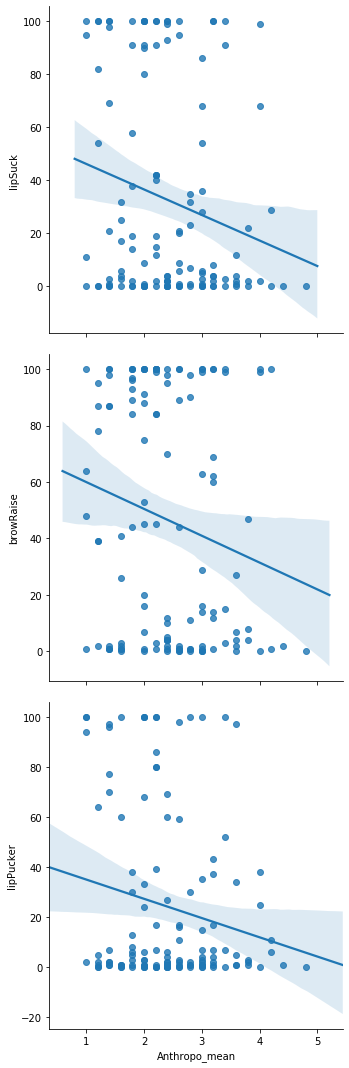

In [35]:
sns.pairplot(kind="reg", data=df_corr_max, x_vars ="Anthropo_mean", y_vars = top_3_max, height=5)
plt.show()

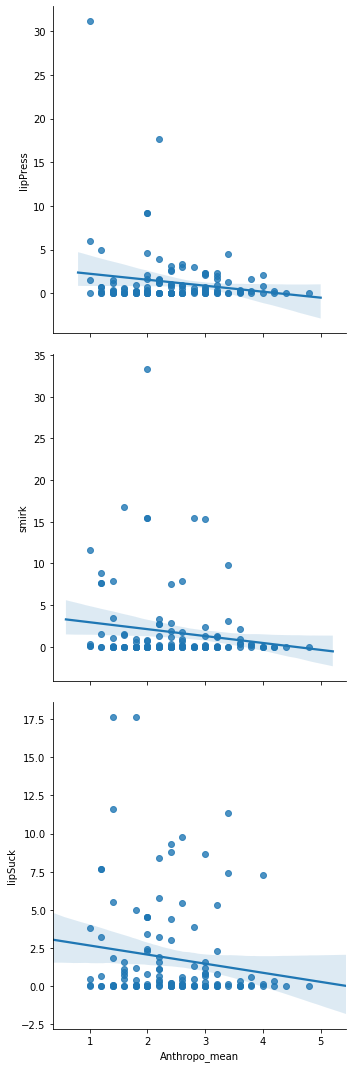

In [36]:
sns.pairplot(kind="reg", data=df_corr_mean, x_vars ="Anthropo_mean", y_vars = top_3_mean, height=5)
plt.show()

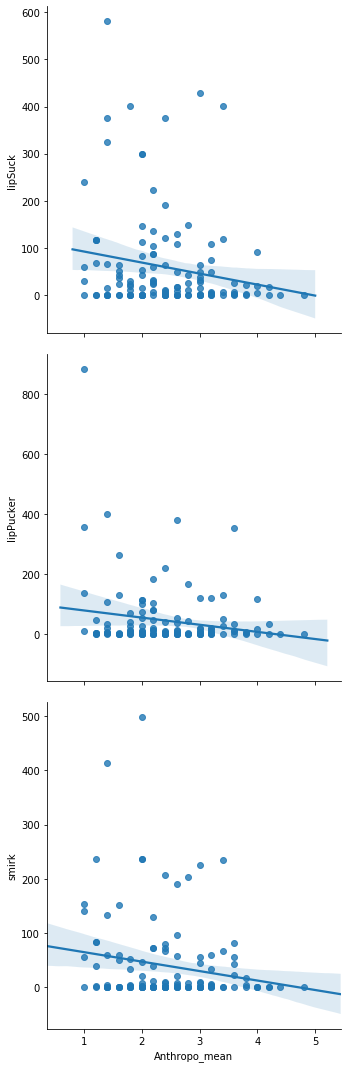

In [44]:
sns.pairplot(kind="reg", data=df_corr_slope, x_vars ="Anthropo_mean", y_vars = top_3_slope, height=5)
plt.show()

### Correlation between each answers and features 

In [29]:
df_corr = pd.concat([df_features_max.drop("nb_timestamps",axis=1), df_answers[ANTHROPOMORPHISM_COLUMNS]], sort=False, axis=1)
df_corr.corr()[ANTHROPOMORPHISM_COLUMNS]

,fake/natural,machinelike/humanlike,unconscious/conscious,artificial/lifelike,ridig/smooth
smile,0.043102,-0.072978,0.127412,-0.029772,-0.005094
innerBrowRaise,0.013483,0.130305,-0.178679,-0.015806,-0.009463
browRaise,-0.113015,-0.072860,-0.160462,-0.150723,-0.139125
browFurrow,-0.186736,-0.088561,-0.047807,-0.048903,-0.123359
noseWrinkle,-0.047443,-0.046583,0.027861,-0.089973,-0.083087
upperLipRaise,-0.027977,-0.116418,-0.069840,-0.142423,-0.081928
lipCornerDepressor,-0.099327,-0.026743,-0.123914,-0.029007,-0.103059
chinRaise,-0.117318,-0.106300,-0.009608,-0.085061,-0.210881
lipPucker,-0.090526,-0.122286,-0.089970,-0.151509,-0.180961
lipPress,-0.050560,-0.037899,0.013434,-0.051635,-0.096875


## Linear regression to predict answers of the survey from features

In [37]:
def predict_answers_from_features(answer_col, features, df_features, df_answers):
    """Given which answer to predict using which features, along with the data:
    build a linear regression model, train it, and asses its performance
    """
    X = df_features[features]
    y = df_answers[answer_col]
    
    #redo n times for better accuracy
    n = 100
    mae_train = [] #mean absolute error on train set
    mae_test = [] #mean absotute error on test set
    for i in range(n):
    # split data into training and testing set
        X_train, X_test, y_train, y_test = train_test_split(X,
                                                            y, test_size=0.2)

        # train the regressor
        reg = LinearRegression().fit(X_train, y_train)

        mae_train.append(np.abs((reg.predict(X_train)-y_train)).mean())
        mae_test.append(np.abs((reg.predict(X_test)-y_test)).mean())
    print("Mean absoute error on train set: {0}".format(np.mean(mae_train)))
    print("Mean absoute error on test set: {0}".format(np.mean(mae_test)))
    
    

In [40]:
#predict anthopomorphism using data aggregated by mean
predict_answers_from_features("Anthropo_mean", top_3_mean, df_features_mean, df_answers)

Mean absoute error on train set: 0.651764789233373
Mean absoute error on test set: 0.6818332098407047


In [41]:
#predict anthopomorphism using data aggregated by max
predict_answers_from_features("Anthropo_mean", top_3_max, df_features_max, df_answers)

Mean absoute error on train set: 0.638104258469441
Mean absoute error on test set: 0.6639023497911805


In [42]:
#predict anthopomorphism using data aggregated by slope
predict_answers_from_features("Anthropo_mean", top_3_slope, df_features_slope, df_answers)

Mean absoute error on train set: 0.6437045757177171
Mean absoute error on test set: 0.657664891738116


In [43]:
#predict animacy using data aggregated by mean
predict_answers_from_features("Animacy_mean", top_3_mean, df_features_mean, df_answers)

Mean absoute error on train set: 0.6257266496352603
Mean absoute error on test set: 0.6630395801389024


In [44]:
#predict animacy using data aggregated by max
predict_answers_from_features("Animacy_mean", top_3_max, df_features_max, df_answers)

Mean absoute error on train set: 0.6171027624249137
Mean absoute error on test set: 0.6296058431215917


In [45]:
#predict animacy using data aggregated by slope
predict_answers_from_features("Animacy_mean", top_3_slope, df_features_slope, df_answers)

Mean absoute error on train set: 0.6122154919848761
Mean absoute error on test set: 0.6313118651310876


In [46]:
#predict likeability using data aggregated by mean
predict_answers_from_features("Likeability_mean", top_3_mean, df_features_mean, df_answers)

Mean absoute error on train set: 0.6862848281235688
Mean absoute error on test set: 0.70739345525676


In [47]:
#predict likeabiliy using data aggregated by max
predict_answers_from_features("Intelligence_mean", top_3_max, df_features_max, df_answers)

Mean absoute error on train set: 0.6854168285486881
Mean absoute error on test set: 0.735247409563517


In [48]:
#predict likeability using data aggregated by slope
predict_answers_from_features("Likeability_mean", top_3_slope, df_features_slope, df_answers)

Mean absoute error on train set: 0.6884091086327675
Mean absoute error on test set: 0.7279287576831598


In [49]:
#predict anthopomorphism using data aggregated by mean
predict_answers_from_features("Intelligence_mean", top_3_mean, df_features_mean, df_answers)

Mean absoute error on train set: 0.6356708584000509
Mean absoute error on test set: 0.6606769107365111


In [50]:
#predict anthopomorphism using data aggregated by mean
predict_answers_from_features("Intelligence_mean", top_3_max, df_features_max, df_answers)

Mean absoute error on train set: 0.6343583032142928
Mean absoute error on test set: 0.6518160835172482


In [51]:
#predict anthopomorphism using data aggregated by mean
predict_answers_from_features("Intelligence_mean", top_3_slope, df_features_slope, df_answers)

Mean absoute error on train set: 0.6457254240821684
Mean absoute error on test set: 0.6774111367535819


## Prediction using aggregated answers (not using facial features)

In [52]:
# predict the answers using the mean of answers
y_pred_simple = df_answers["Anthropo_mean"].mean()
mae_simple = (df_answers["Anthropo_mean"]-y_pred_simple).abs().mean()
mae_simple

0.664970414201183

In [53]:
# predict the answers using the mean of answers
y_pred_simple = df_answers["Animacy_mean"].mean()
mae_simple = (df_answers["Animacy_mean"]-y_pred_simple).abs().mean()
mae_simple

0.6359960552268243

In [54]:
# predict the answers using the mean of answers
y_pred_simple = df_answers["Intelligence_mean"].mean()
mae_simple = (df_answers["Intelligence_mean"]-y_pred_simple).abs().mean()
mae_simple

0.6738698224852068

In [55]:
# predict the answers using the mean of answers
y_pred_simple = df_answers["Intelligence_mean"].mean()
mae_simple = (df_answers["Intelligence_mean"]-y_pred_simple).abs().mean()
mae_simple

0.6738698224852068

## Try to predict video_id from features

In [33]:
X = df_features_max[CONSIDERED_FEATURES]
y = df_features_max.index.get_level_values(1)
n = 100
err = []
for i in range(n):
    # split data into training and testing set
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y, test_size=0.1)


    gnb = GaussianNB()
    y_pred = gnb.fit(X_train, y_train).predict(X_test)
    err.append((y_test == y_pred).sum())
print("Average accuracy: {0}%".format(np.mean(err)/len(y_test) *100))

Average accuracy: 25.615384615384617%


### Try to predict video_id from answers

In [34]:
X = df_answers
y = df_features_max.index.get_level_values(1)
n = 100
err = []
for i in range(n):
    # split data into training and testing set
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y, test_size=0.1)


    gnb = GaussianNB()
    y_pred = gnb.fit(X_train, y_train).predict(X_test)
    err.append((y_test == y_pred).sum())
print("Average accuracy: {0}%".format(np.mean(err)/len(y_test) *100))

Average accuracy: 66.15384615384615%


### Plot feature

<Figure size 1440x720 with 0 Axes>

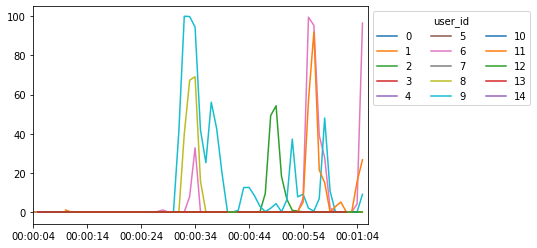

In [49]:
fig = plt.figure(figsize=(20,10))

feature_name = "smile"
t = pd.read_csv(DATAFRAMES_PATH + "df_" + feature_name + "_3.csv")
t.drop("video_id",inplace=True, axis=1)
t.set_index("user_id", inplace=True)
t[0:15].T.plot()
plt.legend(title="user_id", loc='best', ncol=3, bbox_to_anchor=(1, 1, 0, 0))
plt.show()

### Features for each video and user

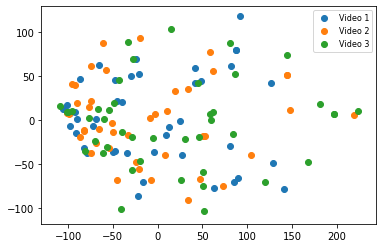

In [39]:
X = df_features_max.values[:,1:]
pca = PCA(n_components=2)
y = pca.fit_transform(X)
vid1 = plt.scatter(y[::3][:,0], y[::3][:,1])
vid2 = plt.scatter(y[1::3][:,0], y[1::3][:,1])
vid3 = plt.scatter(y[2::3][:,0], y[2::3][:,1])

plt.legend((vid1,vid2,vid3),
           ('Video 1', 'Video 2', 'Video 3'),
         fontsize=8)

plt.show()

### Answers for each video and user

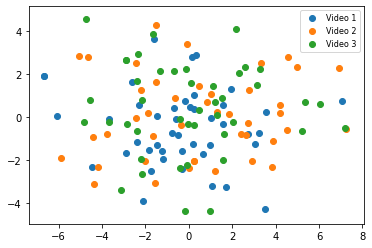

In [40]:
X = df_answers.values
pca = PCA(n_components=2)
y = pca.fit_transform(X)
colors = df_answers.index.get_level_values(1)
vid1 = plt.scatter(y[::3][:,0], y[::3][:,1])
vid2 = plt.scatter(y[1::3][:,0], y[1::3][:,1])
vid3 = plt.scatter(y[2::3][:,0], y[2::3][:,1])

plt.legend((vid1,vid2,vid3),
           ('Video 1', 'Video 2', 'Video 3'),
         fontsize=8)

plt.show()